In [46]:
import pymc
import numpy as np

%matplotlib inline

coin bias: 0.61
 [-----------------100%-----------------] 10000 of 10000 complete in 0.8 sec[ 0.48285583  0.47977968  0.47977968 ...,  0.61040673  0.61040673
  0.61040673]
bias: <pymc.MCMC.MCMC object at 0x7f4cb1330240>
Generating histogram of bias


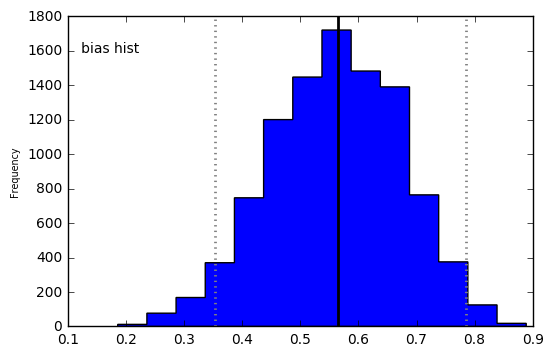

In [81]:



flips = np.array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

print("coin bias: %0.2f" % flips.mean())

alpha = pymc.Uniform('alpha', lower=1, upper=20)
beta = pymc.Uniform('beta', lower=1, upper=100)


bias = pymc.Beta("bias", alpha=alpha, beta=beta)
coin = pymc.Bernoulli("coin",
                      p=bias,
                      value=flips,
                      observed=True)
# mod = pymc.Model([alpha, beta, bias, coin])
mod = pymc.Model([bias, coin])


mc = pymc.MCMC(mod)

mc.sample(iter=10000, burn=100)

trace = mc.trace('bias')[:]
print(trace)
print("bias: %s" % mc)

pymc.Matplot.histogram(trace, "bias")


Plotting beta
Plotting bias
Plotting alpha


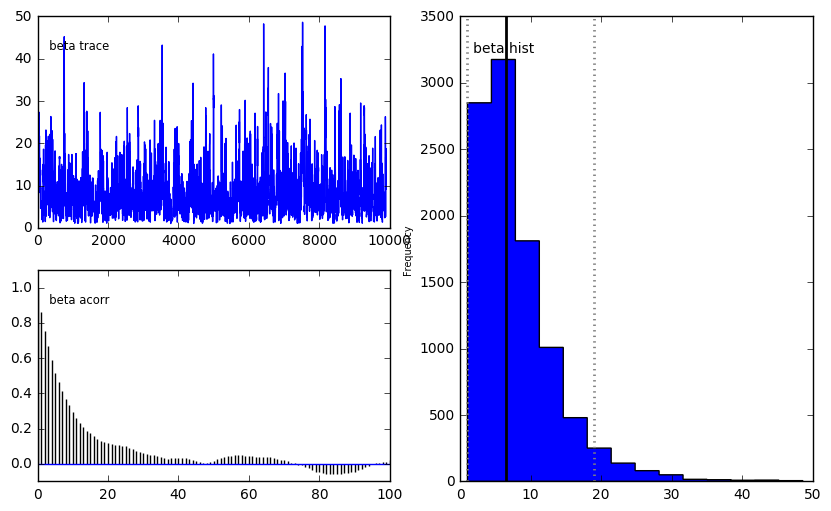

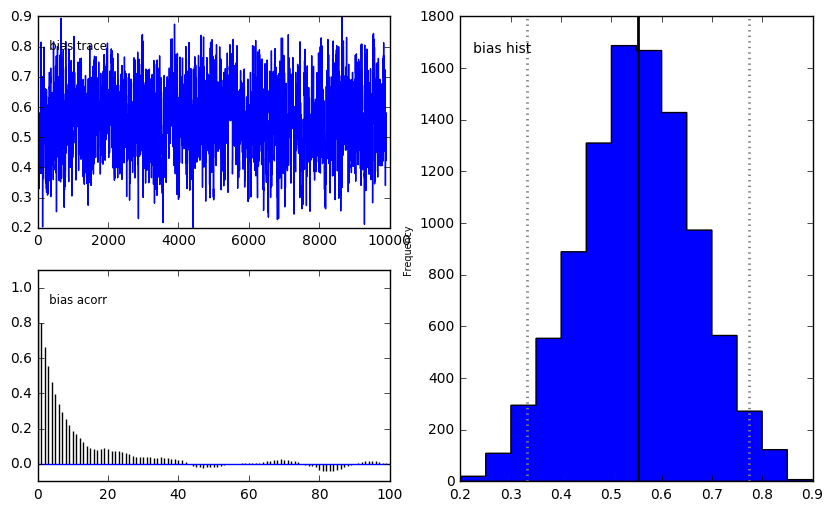

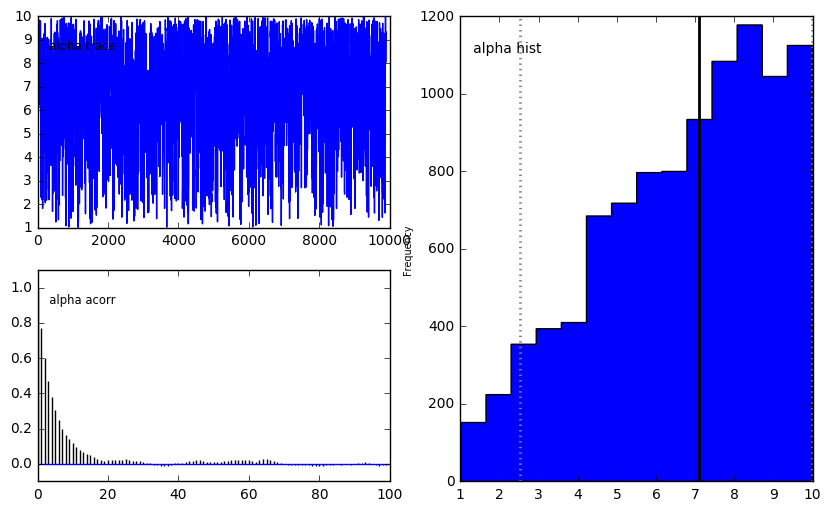

In [79]:
pymc.Matplot.plot(mc)

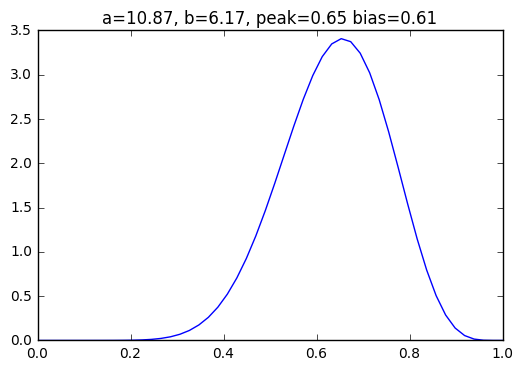

In [82]:
a=alpha.value
b=beta.value
bv = bias.value

from scipy.stats import beta as bdist
import matplotlib.pyplot as plt
x = np.linspace(0,1)
y = bdist.pdf(x,a,b)
idx = np.argmax(y)
peakx = x[idx]
plt.plot(x,y)
plt.title("a=%.2f, b=%.2f, peak=%.2f bias=%.2f" % (a,b, peakx, bv))